In [1]:
import sys
import os
from IPython.core.display import display, HTML

#os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli\Anaconda3\envs\python36\Library\bin"
os.environ['NUMBAPRO_CUDALIB']=r"C:\Users\hyli93\Miniconda3\envs\py3gpu\Library\bin"

sys.path.append('C:/Users/hyli93/Documents/GitHub/Phasing/')
display(HTML("<style>.container { width:95% !important; }</style>"))


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import PhaseTool

# Create a smooth object

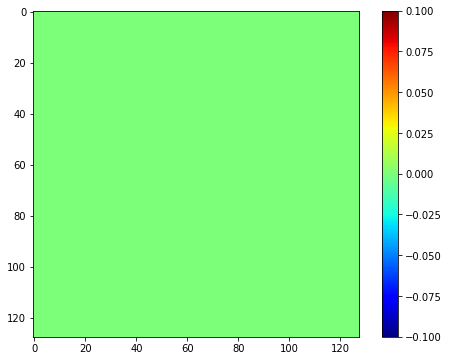

In [2]:
sample = PhaseTool.util.get_smooth_sample()

fig = plt.figure(figsize=(8,6))
plt.imshow(sample, cmap='jet')
plt.colorbar()
plt.show()

In [30]:
import numba
from numba import float64, int64, void

In [33]:
#@numba.jit(void(float64[:, :], int64[:], int64, int64), nopython=True, parallel=True)
def create_disk(space, center, radius, radius_square):
    """
    This function create a disk.

    :param space:
    :param center:
    :param radius:
    :param radius_square:
    :return:
    """
    for l in range(- radius, radius):
        for m in range( - radius, radius):
            if l * l + m * m <= radius_square:
                space[l + center[0], m + center[1]] += 1.


def get_smooth_sample(space_length=128, support_length=48, obj_num=50):
    """
    This function returns a smooth sample for test.
    :param space_length:
    :param support_length:
    :param obj_num:
    :return:
    """
    # Step 1: Get the center of the space and change the format.
    obj_num = int(obj_num)
    center = (int(space_length / 2.), int(space_length / 2.0))

    # Step 2: Generate 50 random center position and 50 random length
    center_list = np.random.randint(low=center[0] - int(support_length / 2.0),
                                    high=center[0] + int(support_length / 2.0),
                                    size=(obj_num, 2),
                                    dtype=np.int64)
    radius_list = np.random.randint(low=1, high=5, size=obj_num)
    radius_square = np.square(radius_list)

    # Step 3: Use the create_disk function to create these objects in the space
    space = np.zeros((space_length, space_length), dtype=np.float64)

    for l in range(obj_num):
        space = create_disk(space=space,
                            center=center_list[l],
                            radius=radius_list[l],
                            radius_square=radius_square[l])

    ndimage.gaussian_filter(input=space, sigma=2, output=space)
    return space


In [34]:
sample= get_smooth_sample()

fig = plt.figure(figsize=(8,6))
plt.imshow(sample, cmap='jet')
plt.colorbar()
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [28]:
a

array([1, 1, 1, 6, 2, 3, 6, 2, 4, 1, 6, 5, 8, 2, 1, 8, 4, 2, 5, 1, 7, 5,
       1, 6, 7, 1, 2, 7, 8, 7, 5, 7, 6, 6, 1, 8, 2, 7, 8, 6, 6, 1, 4, 2,
       1, 8, 6, 3, 2, 4])